# Exploratory Analysis

## Problems:

Load the NYC AirBnB Truncated Dataset. This dataset is a mirror of the full NYC AirBnB dataset found at Kaggle, but only contains the first 10,000 entries. 

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

For the numerical features, 

1) Display histograms for the numerical features. 

2) Construct the scatter plots of price with each of the numerical features.

3) Display the correlation histogram.  

4) Using numerical features to predict the renting price. 

5) Write down the predict function from (4)

6) Calculate the RSS cost.  

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv("https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Datasets/NYCAirBnB/train.csv")
data

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Cozy apt in heart of the e village,40076332,Steven,Manhattan,East Village,40.72644,-73.98403,Entire home/apt,175,5,0,NaN,NaN,1,0
9995,Perfect Location - Meticulously Kept Flat,12620454,Will,Brooklyn,Bushwick,40.70442,-73.92484,Entire home/apt,220,5,27,1/1/2017,0.57,1,0
9996,Garden Apt in Historic Brownstone!,2060383,Lisa,Brooklyn,Cobble Hill,40.68732,-73.99245,Entire home/apt,147,3,23,6/16/2019,0.51,1,2
9997,East Village Private Room & Terrace,39956905,Can,Manhattan,East Village,40.72811,-73.98453,Private room,95,2,1,8/29/2015,0.02,2,0


In [2]:
data.size

149985

In [3]:
data.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
data.isnull().sum()

name                                 8
host_id                              0
host_name                           10
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1322
reviews_per_month                 1322
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
cleaned_data = data.drop(columns=['name',
                                  'host_id',
                                  'host_name',
                                  'neighbourhood_group',
                                  'neighbourhood',
                                  'room_type',
                                  'last_review',
                                  'latitude',
                                  'longitude'])

In [8]:
cleaned_data.dtypes

price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [9]:
cleaned_data.size

51996

In [10]:
X = cleaned_data.drop(columns='price').values
Y = cleaned_data['price'].values
ones = np.ones(X.shape[0]).reshape((-1, 1))
X = np.concatenate((ones, X), axis=1)

# Histogram

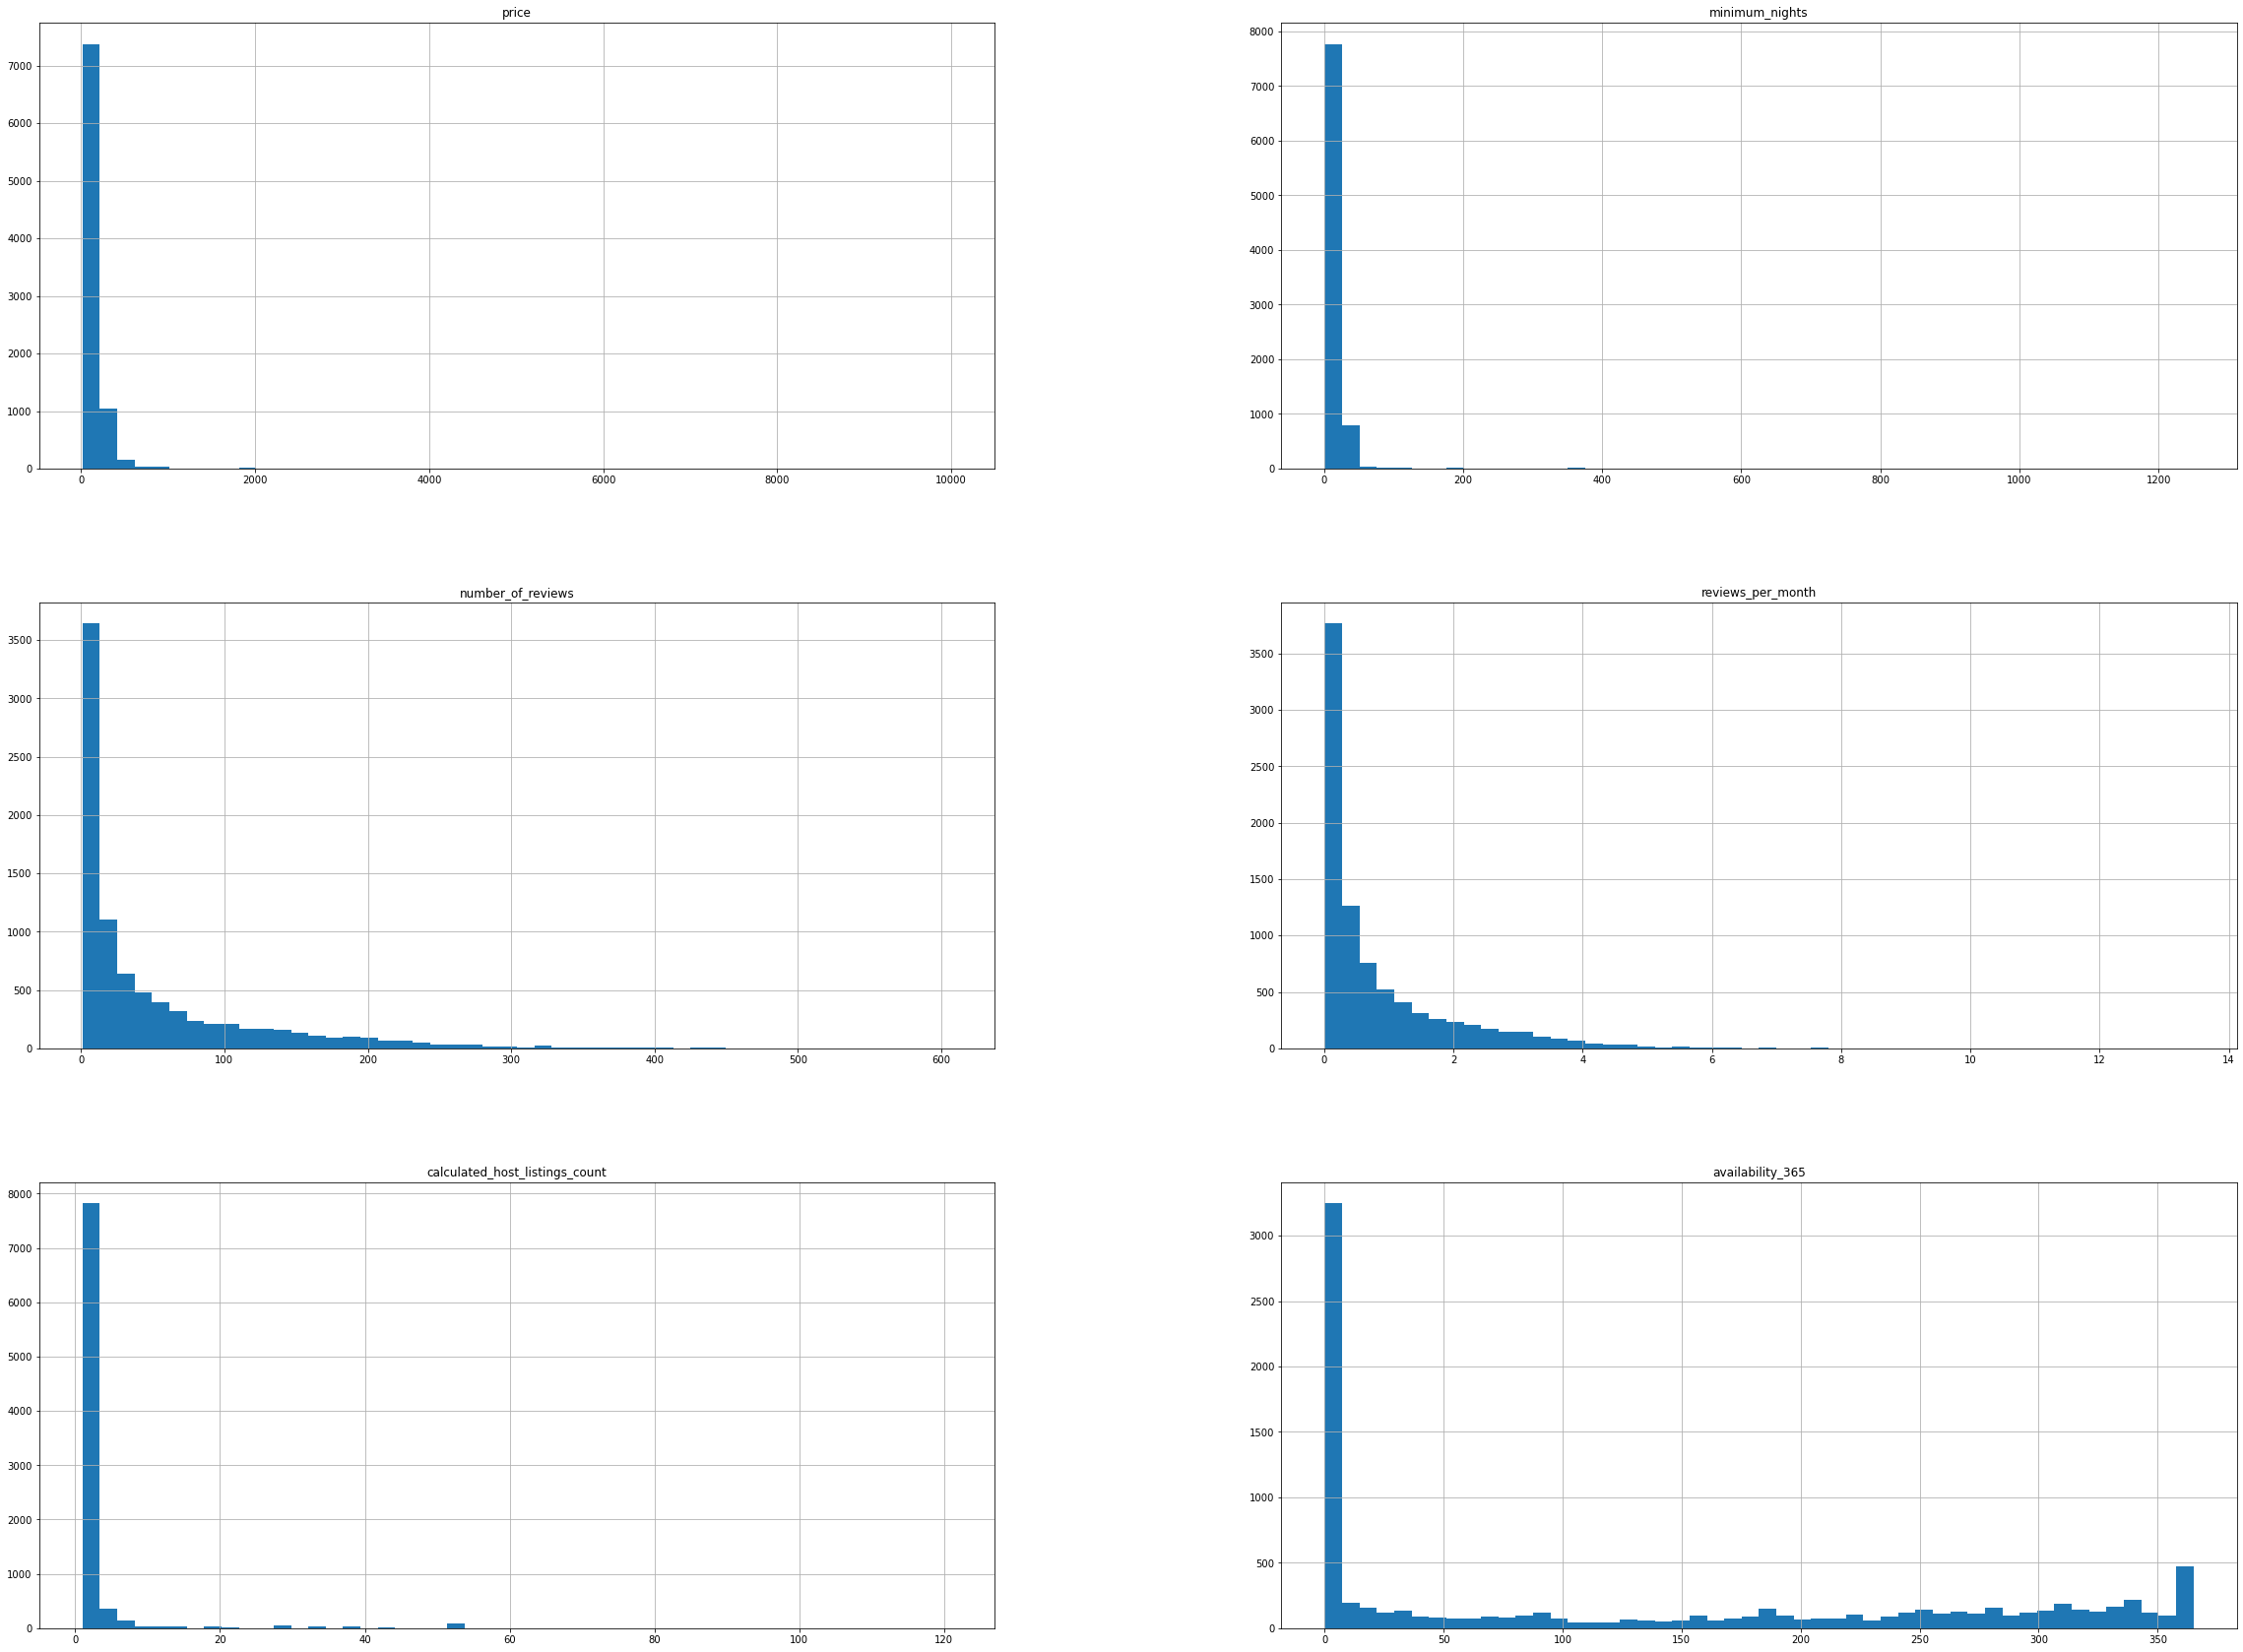

In [11]:
cleaned_data.hist(bins=50, figsize=(40, 30))
plt.show()

In [12]:
names = list(cleaned_data)
X[:,1]

array([1., 1., 1., ..., 3., 2., 5.])

In [13]:
import collections

collections.Counter(X[:, 0])

Counter({1.0: 8666})

# ScatterPlot

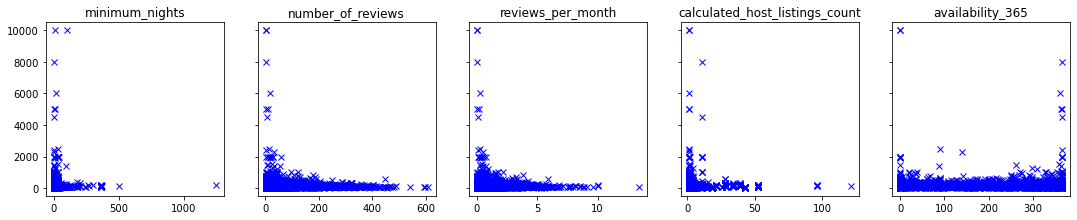

In [14]:
f, axes = plt.subplots(1, 5, sharey = True)
f.set_size_inches(15, 3)
f.tight_layout()

axes = axes.reshape(5)

for i in range(1, 6):
    axes[i - 1].plot(X[:, i], Y, 'x', color='Blue')
    axes[i - 1].set_title(names[i], fontsize=12)

# Correlation

In [15]:
correlation_matrix = cleaned_data.corr()
correlation_matrix

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.017411,-0.048167,-0.051965,-0.005579,0.036689
minimum_nights,0.017411,1.000000,-0.084284,-0.092076,0.149947,0.092845
number_of_reviews,-0.048167,-0.084284,1.000000,0.908990,-0.073083,0.257172
reviews_per_month,-0.051965,-0.092076,0.908990,1.000000,-0.074281,0.229506
calculated_host_listings_count,-0.005579,0.149947,-0.073083,-0.074281,1.000000,0.230261
availability_365,0.036689,0.092845,0.257172,0.229506,0.230261,1.000000


In [16]:
price_correlation = correlation_matrix["price"]
filter_data = price_correlation[price_correlation > .4]

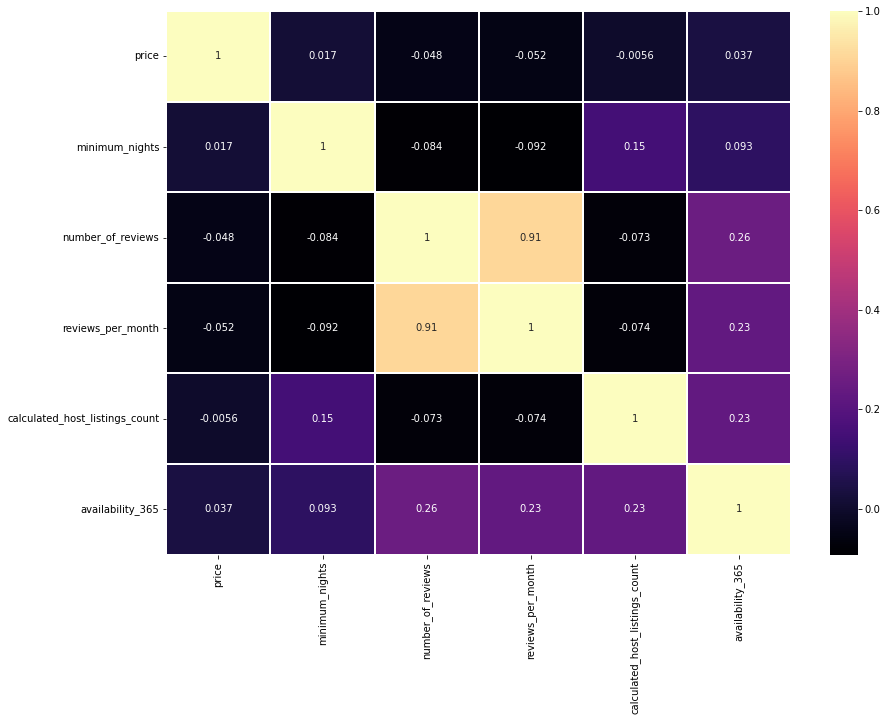

In [17]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(correlation_matrix, ax=ax, linewidths=0.05,cmap="magma",annot=True)
plt.show()

# Linear Regression

In [18]:
# Linear regression matrix calculation
def normal_equation(x, y, w=None):
    if w is None:
        return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    else:
        return np.linalg.inv(x.T.dot(w).dot(x)).dot(x.T).dot(w).dot(y)

In [27]:
theta = normal_equation(X, Y)
theta

array([ 1.53653049e+02,  9.71859196e-02, -7.57117577e-02, -9.63865829e+00,
       -9.04265726e-01,  1.02602014e-01])

# Predict function

In [29]:
def predict(theta, x):
    return np.dot(theta, x)

In [32]:
predict(theta, X[1, :])

181.2956996838241

# RSS

In [33]:
def rss(X, Y):
    theta = normal_equation(X, Y)
    error = X @ theta - Y
    return np.sqrt(np.sum(error**2) / Y.shape[0])

In [34]:
rss(X, Y)

241.39227025034242